In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from sklearn import metrics
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [53]:
dir = "data/CK+48"
img_size = 50
epochs = 90
batch_size = 60
dir_list=os.listdir(dir)
image_data_list=[]
labels=[]
# emotions=[]
# l=0
for data_dir in dir_list:
    data_list=os.listdir(dir+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(dir+'/'+data_dir+'/'+img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img=cv2.resize(input_img,(img_size,img_size))
        input_img = np.expand_dims(input_img, axis=-1)
        image_data_list.append(input_img)
        labels.append(data_dir)
    # emotions.append(data_dir)
    # l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255

num_classes=7

target_dict={k: v for v, k in enumerate(np.unique(labels))}
target_val=  [target_dict[labels[i]] for i in range(len(labels))]

Y = keras.utils.to_categorical(target_val, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [54]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(img_size,img_size,1),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))


In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 50, 50, 64)        640       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 128)      

In [56]:
model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [57]:
%%time
history = model.fit(X_train, y_train,epochs = epochs, batch_size=batch_size, validation_data = (X_val, y_val))

Epoch 1/90
10/10 [==============================] - 10s 892ms/step - loss: 2.2693 - accuracy: 0.2357 - val_loss: 1.9157 - val_accuracy: 0.1667
Epoch 2/90
10/10 [==============================] - 8s 845ms/step - loss: 1.8815 - accuracy: 0.2378 - val_loss: 1.8408 - val_accuracy: 0.2536
Epoch 3/90
10/10 [==============================] - 8s 842ms/step - loss: 1.8499 - accuracy: 0.2313 - val_loss: 1.8145 - val_accuracy: 0.2536
Epoch 4/90
10/10 [==============================] - 9s 891ms/step - loss: 1.8368 - accuracy: 0.2718 - val_loss: 1.8129 - val_accuracy: 0.2536
Epoch 5/90
10/10 [==============================] - 10s 962ms/step - loss: 1.8518 - accuracy: 0.2408 - val_loss: 1.8374 - val_accuracy: 0.1667
Epoch 6/90
10/10 [==============================] - 9s 928ms/step - loss: 1.8506 - accuracy: 0.1961 - val_loss: 1.8183 - val_accuracy: 0.2536
Epoch 7/90
10/10 [==============================] - 10s 952ms/step - loss: 1.8297 - accuracy: 0.2572 - val_loss: 1.8252 - val_accuracy: 0.2536
Epo

In [58]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 107ms/step - loss: 0.1277 - accuracy: 0.9492


[0.12772467732429504, 0.9491525292396545]

In [62]:
preds = np.round(model.predict(X_test), 0)
emotions = ['anger','contempt','disgust','fear','happy','sadness','surprise']
classification_metrics = metrics.classification_report(y_test, preds, target_names=emotions)
print(classification_metrics)

              precision    recall  f1-score   support

       anger       0.88      1.00      0.94        46
    contempt       0.95      0.91      0.93        22
     disgust       0.98      0.98      0.98        46
        fear       0.91      0.91      0.91        22
       happy       0.97      1.00      0.99        68
     sadness       0.92      0.75      0.83        16
    surprise       1.00      0.92      0.96        75

   micro avg       0.96      0.95      0.95       295
   macro avg       0.95      0.92      0.93       295
weighted avg       0.96      0.95      0.95       295
 samples avg       0.95      0.95      0.95       295

/Users/edwinagbakpe/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


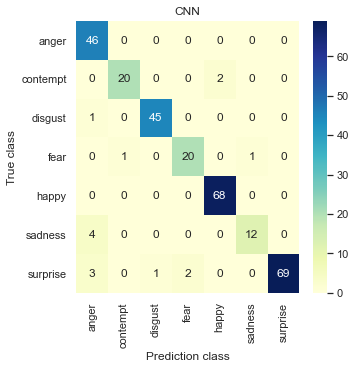

In [68]:
test_labels = pd.DataFrame(y_test).idxmax(axis=1)
test_preds = pd.DataFrame(preds).idxmax(axis=1)

cm = confusion_matrix(test_labels, test_preds)
cm_df = pd.DataFrame(cm, index=['anger','contempt','disgust','fear','happy','sadness','surprise'], columns=['anger','contempt','disgust','fear','happy','sadness','surprise'])

import seaborn as sns
sns.set_theme()
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, annot = True,cmap='YlGnBu',cbar=True)
plt.title('CNN')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()